In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('labeled_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
dataset.iloc[1]['tweet']

'!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [7]:
dt_trasformed = dataset[['class', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

In [8]:
dt_trasformed.iloc[:, :-1].values

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [10]:
y[]

SyntaxError: invalid syntax (1292830495.py, line 1)

In [11]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

In [12]:
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]


In [13]:
corpus = []
for i in range(0, 24783):
  review = re.sub('[^a-zA-Z]', ' ', dt_trasformed['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
corpus

['rt mayasolov woman complain clean hous amp man alway take trash',
 'rt mleew boy dat cold tyga dwn bad cuffin dat hoe st place',
 'rt urkindofbrand dawg rt sbabi life ever fuck bitch start cri confus shit',
 'rt c g anderson viva base look like tranni',
 'rt shenikarobert shit hear might true might faker bitch told ya',
 'madison x shit blow claim faith somebodi still fuck hoe',
 'brighterday not sit hate anoth bitch got much shit go',
 'selfiequeenbri caus tire big bitch come us skinni girl',
 'amp might not get ya bitch back amp that',
 'rhythmixx hobbi includ fight mariam bitch',
 'keek bitch curv everyon lol walk convers like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatev',
 'bitch love',
 'bitch get cut everyday b',
 'black bottl amp bad bitch',
 'broke bitch cant tell noth',
 'cancel bitch like nino',
 'cant see hoe wont chang',
 'fuck bitch dont even suck dick kermit video bout f

In [15]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()

In [16]:
len(X)

24783

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size = 0.20, random_state = 0)

In [18]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)

GaussianNB()

In [19]:
classifier_np.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [20]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
from sklearn.metrics import precision_score, recall_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score

In [24]:
#making confusion matrices 

In [28]:
#Naive Bayes
y_pred_np = classifier_np.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

[[1969 2709]
 [  90  189]]


In [36]:
precision_np = precision_score(y_test, y_pred_np)
recall_np = recall_score(y_test, y_pred_np)
mse_np = mean_squared_error(y_test, y_pred_np)
accuracy_np = accuracy_score(y_test, y_pred_np)
f1_np = f1_score(y_test, y_pred_np)
auc_np = roc_auc_score(y_test, y_pred_np)

In [30]:
# Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[4455  223]
 [ 188   91]]


In [37]:
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

In [31]:
#Linear Regression
y_pred_lr = classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[4614   64]
 [ 229   50]]


In [38]:
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

In [32]:
#Random Florest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[4586   92]
 [ 213   66]]


In [39]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

In [40]:
# Print Metrics for Gaussian Naive Bayes
print("Metrics for Gaussian Naive Bayes:")
print("Precision:", precision_np)
print("Recall:", recall_np)
print("Mean Square Root:", mse_np)
print("Accuracy:", accuracy_np)
print("F1 Score:", f1_np)
print("AUC:", auc_np)
print("\n")

# Print Metrics for Decision Tree
print("Metrics for Decision Tree:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Mean Square Root:", mse_dt)
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)
print("AUC:", auc_dt)
print("\n")


# Print Metrics for Logistic Regression
print("Metrics for Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("Mean Square Root:", mse_lr)
print("Accuracy:", accuracy_lr)
print("F1 Score:", f1_lr)
print("AUC:", auc_lr)
print("\n")

# Print Metrics for Random Forest
print("Metrics for Random Forest:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Mean Square Root:", mse_rf)
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("AUC:", auc_rf)
print("\n")


Metrics for Gaussian Naive Bayes:
Precision: 0.06521739130434782
Recall: 0.6774193548387096
Mean Square Root: 0.5646560419608634
Accuracy: 0.43534395803913656
F1 Score: 0.11898016997167139
AUC: 0.5491628625412017


Metrics for Decision Tree:
Precision: 0.2898089171974522
Recall: 0.32616487455197135
Mean Square Root: 0.08291305224934437
Accuracy: 0.9170869477506557
F1 Score: 0.3069139966273187
AUC: 0.6392474650656395


Metrics for Logistic Regression:
Precision: 0.43859649122807015
Recall: 0.17921146953405018
Mean Square Root: 0.059108331652208995
Accuracy: 0.940891668347791
F1 Score: 0.2544529262086514
AUC: 0.5827652046259391


Metrics for Random Forest:
Precision: 0.4177215189873418
Recall: 0.23655913978494625
Mean Square Root: 0.061529150695985475
Accuracy: 0.9384708493040145
F1 Score: 0.30205949656750575
AUC: 0.6084463078146621




In [33]:
rf_score = accuracy_score(y_test, y_pred_rf)
lr_score = accuracy_score(y_test, y_pred_lr)
dt_score = accuracy_score(y_test, y_pred_dt)
np_score = accuracy_score(y_test, y_pred_np)

print('Random Forest Accuracy: ', str(rf_score))
print('Linear Regression Accuracy: ', str(lr_score))
print('Decision Tree Accuracy: ', str(dt_score))
print('Naive Bayes Accuracy: ', str(np_score))

Random Forest Accuracy:  0.9384708493040145
Linear Regression Accuracy:  0.940891668347791
Decision Tree Accuracy:  0.9170869477506557
Naive Bayes Accuracy:  0.43534395803913656


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [ ]:
stopword=set(stopwords.words('english'))

In [ ]:
len(stopword)

In [ ]:
stopword

In [ ]:
# Save the stopwords to a file
with open('stopwords.txt', 'w') as file:
    file.write('\n'.join(stopword))

In [ ]:
stopwords_file_path = 'stopwords.txt'
with open(stopwords_file_path, 'r') as file:
    stopwords_list = set(file.read().splitlines())

In [ ]:
len(stopwords_list)

In [ ]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [ ]:
stemmer

In [ ]:
test = 'I wanna kill you and rape you and cut you in pieces'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopwords_list]
    print(text)
    text=" ".join(text)
    print(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    print(text)
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)

In [ ]:
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("hate&abusive_model.h5")

In [ ]:
import keras

In [ ]:
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
test = 'I wanna kill you and rape you and cut you in pieces'

In [ ]:

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text



In [ ]:
test=[clean_text(test)]
print(test)

In [ ]:
import nltk
print("NLTK data path:", nltk.data.path)

In [ ]:
stemmer.stem('')

In [ ]:
dir(nltk)

In [ ]:
stemmer.stemmer

In [ ]:
nltk.SnowballStemmer

In [ ]:
def custom_stemmer(words):
    stemmed_words = []
    for word in words:
        # Simulate a simple rule-based stemming
        if word.endswith("ing"):
            stemmed_word = word[:-3]  # Remove "ing"
        elif word.endswith("ly"):
            stemmed_word = word[:-2]  # Remove "ly"
        else:
            stemmed_word = word

        stemmed_words.append(stemmed_word)

    return stemmed_words

# Example words to stem
words_to_stem = ['running', 'jumps', 'played', 'happiness', 'happily', 'better']

# Perform stemming using the custom stemmer
stemmed_words = custom_stemmer(words_to_stem)

# Print the results
for original, stemmed in zip(words_to_stem, stemmed_words):
    print(f"{original} -> {stemmed}")


In [ ]:
stemmer.stem('motherfucker')

In [ ]:
import requests

url = "https://twinword-lemmatizer1.p.rapidapi.com/extract/"

payload = { "text": "The frogs hopped from rocker to rocker." }
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"X-RapidAPI-Key": "1a96daa57bmsh07641b4097c153cp1d26a7jsn659d777069a8",
	"X-RapidAPI-Host": "twinword-lemmatizer1.p.rapidapi.com"
}

response = requests.post(url, data=payload, headers=headers)

print(response.json())

In [ ]:
tt1 = re.sub('\n', '', tt)

In [ ]:
tt = 'friend motherfuck\n'

In [ ]:
type(tt)

In [ ]:
tt1

In [ ]:
type(tt1)

In [ ]:
kk = True

In [ ]:
type(kk)

In [ ]:
kk = False

In [ ]:
kk

In [ ]:
print(kk)

In [42]:
import matplotlib.pyplot as plt

# Metrics for Gaussian Naive Bayes
gnb_metrics = {
    'Precision': 0.06521739130434782,
    'Recall': 0.6774193548387096,
    'Mean Square Root': 0.5646560419608634,
    'Accuracy': 0.43534395803913656,
    'F1 Score': 0.11898016997167139,
    'AUC': 0.5491628625412017
}

# Metrics for Decision Tree
dt_metrics = {
    'Precision': 0.2898089171974522,
    'Recall': 0.32616487455197135,
    'Mean Square Root': 0.08291305224934437,
    'Accuracy': 0.9170869477506557,
    'F1 Score': 0.3069139966273187,
    'AUC': 0.6392474650656395
}

# Metrics for Logistic Regression
lr_metrics = {
    'Precision': 0.43859649122807015,
    'Recall': 0.17921146953405018,
    'Mean Square Root': 0.059108331652208995,
    'Accuracy': 0.940891668347791,
    'F1 Score': 0.2544529262086514,
    'AUC': 0.5827652046259391
}

# Metrics for Random Forest
rf_metrics = {
    'Precision': 0.4177215189873418,
    'Recall': 0.23655913978494625,
    'Mean Square Root': 0.061529150695985475,
    'Accuracy': 0.9384708493040145,
    'F1 Score': 0.30205949656750575,
    'AUC': 0.6084463078146621
}

# Metrics for BERT + MLP
bert_mlp_metrics = {
    'Precision': 0.9032872752268434,
    'Recall': 0.9100443727309399,
    'Mean Square Root': 0.11415893505445744,
    'Accuracy': 0.9100443727309399,
    'F1 Score': 0.9040709471806486,
    'AUC': 0.9273929013070065
}

# Metrics for BERT + CNN
bert_cnn_metrics = {
    'Precision': 0.6297183820716556,
    'Recall': 0.6167809600645422,
    'Mean Square Root': 0.4461476401774909,
    'Accuracy': 0.6167809600645422,
    'F1 Score': 0.6230520183802029,
    'AUC': 0.5152224128470929
}



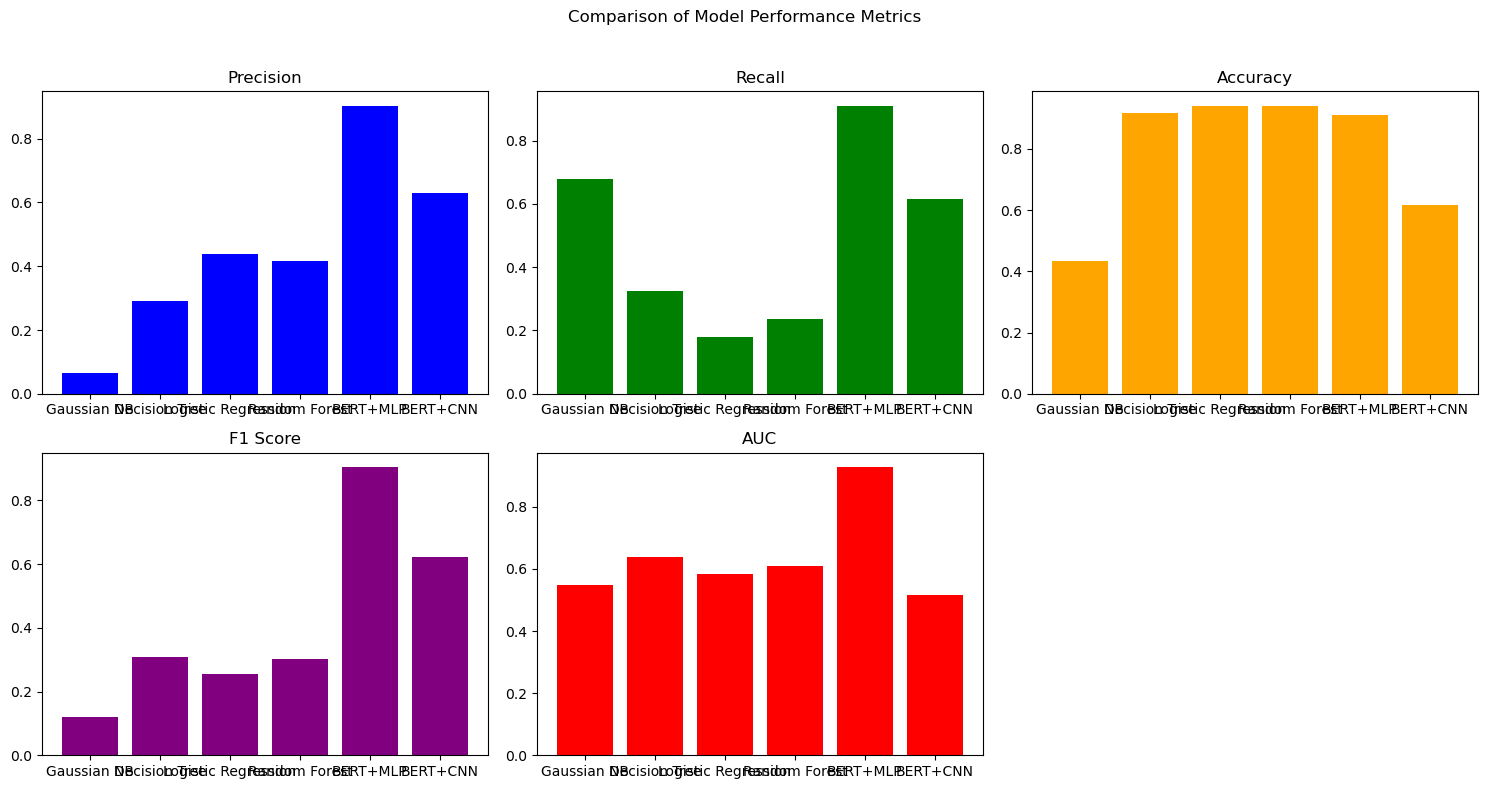

In [51]:
models = ['Gaussian NB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'BERT+MLP', 'BERT+CNN']
precision_values = [gnb_metrics['Precision'], dt_metrics['Precision'], lr_metrics['Precision'], rf_metrics['Precision'],
                    bert_mlp_metrics['Precision'], bert_cnn_metrics['Precision']]
recall_values = [gnb_metrics['Recall'], dt_metrics['Recall'], lr_metrics['Recall'], rf_metrics['Recall'],
                 bert_mlp_metrics['Recall'], bert_cnn_metrics['Recall']]
accuracy_values = [gnb_metrics['Accuracy'], dt_metrics['Accuracy'], lr_metrics['Accuracy'], rf_metrics['Accuracy'],
                   bert_mlp_metrics['Accuracy'], bert_cnn_metrics['Accuracy']]
f1_values = [gnb_metrics['F1 Score'], dt_metrics['F1 Score'], lr_metrics['F1 Score'], rf_metrics['F1 Score'],
             bert_mlp_metrics['F1 Score'], bert_cnn_metrics['F1 Score']]
auc_values = [gnb_metrics['AUC'], dt_metrics['AUC'], lr_metrics['AUC'], rf_metrics['AUC'],
              bert_mlp_metrics['AUC'], bert_cnn_metrics['AUC']]

# Plotting the metrics
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Comparison of Model Performance Metrics')

# Precision
axs[0, 0].bar(models, precision_values, color='blue')
axs[0, 0].set_title('Precision')

# Recall
axs[0, 1].bar(models, recall_values, color='green')
axs[0, 1].set_title('Recall')

# Accuracy
axs[0, 2].bar(models, accuracy_values, color='orange')
axs[0, 2].set_title('Accuracy')

# F1 Score
axs[1, 0].bar(models, f1_values, color='purple')
axs[1, 0].set_title('F1 Score')

# AUC
axs[1, 1].bar(models, auc_values, color='red')
axs[1, 1].set_title('AUC')

# Removing the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


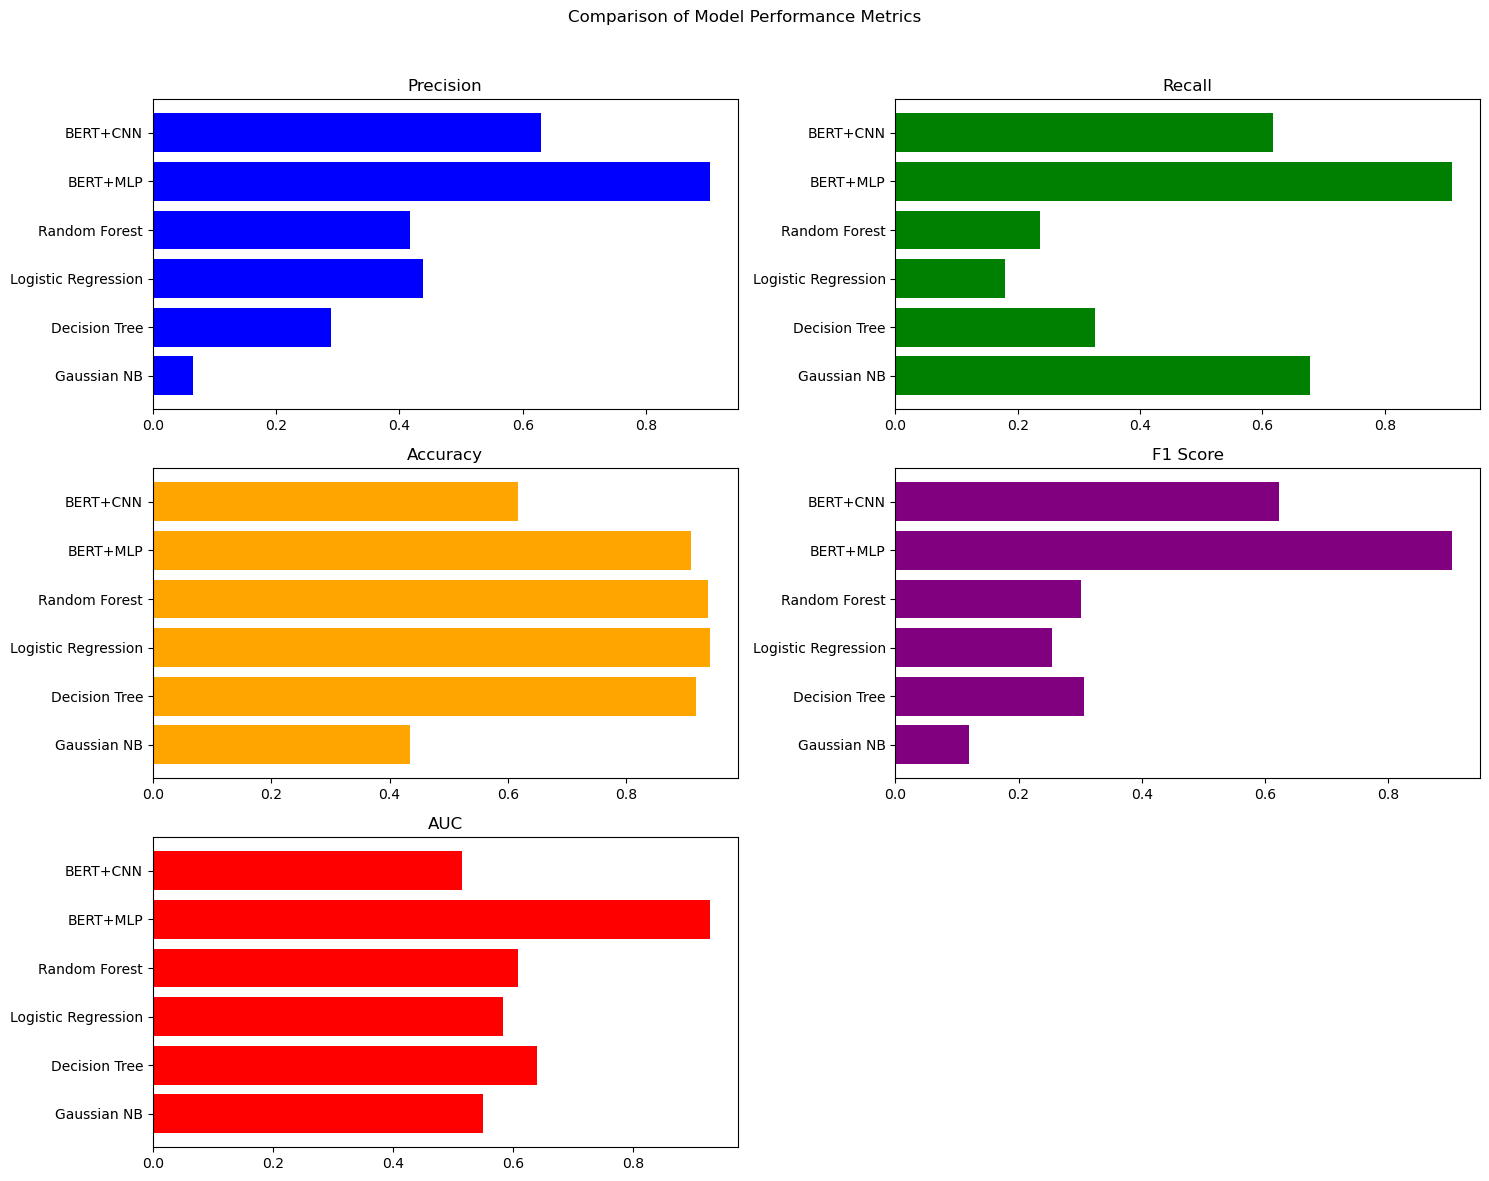

In [52]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Comparison of Model Performance Metrics')

# Precision
axs[0, 0].barh(models, precision_values, color='blue')
axs[0, 0].set_title('Precision')

# Recall
axs[0, 1].barh(models, recall_values, color='green')
axs[0, 1].set_title('Recall')

# Accuracy
axs[1, 0].barh(models, accuracy_values, color='orange')
axs[1, 0].set_title('Accuracy')

# F1 Score
axs[1, 1].barh(models, f1_values, color='purple')
axs[1, 1].set_title('F1 Score')

# AUC
axs[2, 0].barh(models, auc_values, color='red')
axs[2, 0].set_title('AUC')

# Removing the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

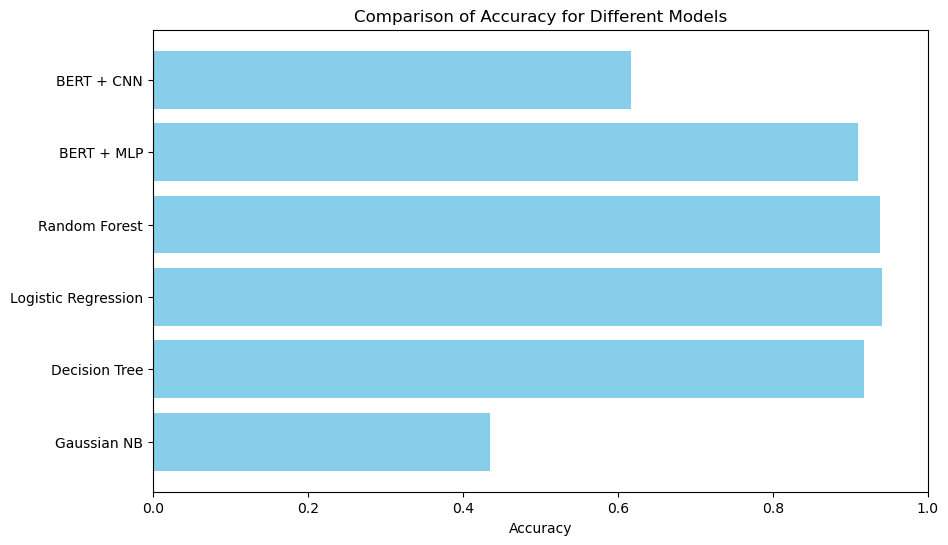

In [53]:
import matplotlib.pyplot as plt

# List of models
models = ['Gaussian NB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'BERT + MLP', 'BERT + CNN']

# Accuracy values for each model
accuracy_values = [0.43534395803913656, 0.9170869477506557, 0.940891668347791, 0.9384708493040145, 0.9100443727309399, 0.6167809600645422]

# Plotting accuracy for different models
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.xlim(0, 1)  # Set the x-axis limit to [0, 1] for accuracy values
plt.show()
